# K-Nearest Neighbors 

The __K-Nearest Neighbors (KNN) algorithm__ uses the idea that data with similar features are likely close together in space. Thus, the algorithm predicts the label of a data point based on the data of the points closest to it. The KNN algorithm can be used both for classification and regression. If used for classification, the algorithm predicts the majority label of the k closest points. If used for regression, the algorithm predicts the average label of the k closest points.

In this module, we implement a KNN algorithm for classification and show how it can also be implemented for regression. We train the algorithm on the [Wisconsin Breast Cancer Data Set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

KNN is versatile and easy to implement, but it tends to not work as well with large data sets. 

Sklearn has its own [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) and [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor), but we will be coding our own KNN algorithm from scratch in this module. 

---

The following packages are required to run the code below:
- [Matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
- [Numpy](https://numpy.org/doc/stable/reference/)

In [47]:
# import the relevant libraries
import matplotlib.pyplot as plt
import numpy as np

# Import the data
from sklearn.datasets import load_breast_cancer

In [48]:
# load the data
cancer = load_breast_cancer(as_frame = True)
cancer['data'].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


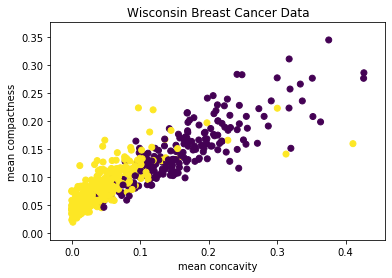

In [49]:
# we plot 'Mean Concavity' against 'Mean Compactness'
plt.scatter(cancer['data']['mean concavity'], cancer['data']['mean compactness'], c = cancer['target'])
plt.xlabel('mean concavity')
plt.ylabel('mean compactness')
plt.title('Wisconsin Breast Cancer Data')
plt.show()

In [50]:
# convert the data into numpy arrays
X = cancer['data'][['mean concavity', 'mean compactness']].to_numpy()
y = cancer['target'].to_numpy()

In [51]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
# define our distance metric
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

# define the KNN algorithm
def k_nearest_neighbors(point, training_features, training_labels, k):
    neighbors = []
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

def KNN_Predict(point, training_features, training_labels, k, regression = False):   
    neighbors = k_nearest_neighbors(point, training_features, training_labels, k)
    
   # outputs the predicted majority label for the k closest points if using KNN for classification
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
   #outputs the predicted average label for the k closest points if using KNN for regression,
    else:
        return sum(x[1] for x in neighbors)/k
    
# define the error
def classification_error(test_features, test_labels,training_features, training_labels,k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point, training_features, training_labels, k)
    return error/k

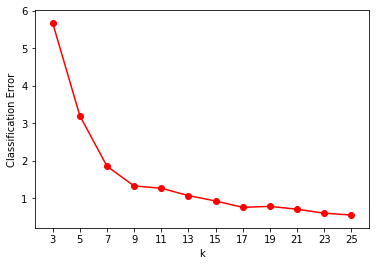

In [53]:
# plot the classification error over k
possible_k = [x for x in range(3, 26, 2)]
errors = [classification_error(X_test, y_test, X_train, y_train, k) for k in possible_k]

plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(possible_k)
plt.show()

---

Thus, our classification error decreases as k increases. We run the code below to ensure our KNN functions are working. 

---

In [54]:
# make sure the functions we defined work
import random
for i in range(1,6):
    k = np.random.randint(1,10)
    p = np.random.randint(len(X_train))
    print('K-Nearest Neighbors to point are: {k_nearest_neighbors(X_train[p], X_train, y_train, k)}')
    KNN_Predict(X_train[p], X_train, y_train, k)
    print(f'True label at point is: {y_train[p]}')
    print(f'Predicted label point is: {KNN_Predict(X_train[p], X_train, y_train, k)}')

K-Nearest Neighbors to point are: {k_nearest_neighbors(X_train[p], X_train, y_train, k)}
True label at point is: 0
Predicted label point is: 0
K-Nearest Neighbors to point are: {k_nearest_neighbors(X_train[p], X_train, y_train, k)}
True label at point is: 1
Predicted label point is: 1
K-Nearest Neighbors to point are: {k_nearest_neighbors(X_train[p], X_train, y_train, k)}
True label at point is: 0
Predicted label point is: 0
K-Nearest Neighbors to point are: {k_nearest_neighbors(X_train[p], X_train, y_train, k)}
True label at point is: 0
Predicted label point is: 0
K-Nearest Neighbors to point are: {k_nearest_neighbors(X_train[p], X_train, y_train, k)}
True label at point is: 1
Predicted label point is: 1


---

They work! Now, we train our algorithm on the training data in order to predict the labels of our test data.

---

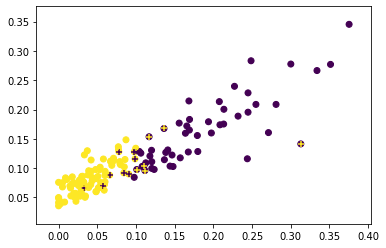

In [55]:
# KNN for classification - we use k = 25
predicted_labels = [KNN_Predict(point, X_train, y_train, 25) for point in X_test]

plt.scatter(X_test[:, 0], X_test[:, 1], c = predicted_labels)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, marker = '+')

In [56]:
# evaluating the accuracy of our classification
error = classification_error(X_test, y_test, X_train, y_train, 25)
error

0.56

---

We obtain an error of 0.56, indicating that our algorithm predicted the labels with relatively high accuracy. Next, we demonstrate how our KNN algorithm can also be used for regression. 

---

In [57]:
# KNN for regression
X = cancer['data'][['mean concavity','mean compactness']].to_numpy()
y = cancer['data']['mean smoothness'].to_numpy()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# set regression = True
predicted_labels = [KNN_Predict(point, X_train, y_train, 3, regression = True) for point in X_test]

In [58]:
# evaluating the accuracy of our algorithm using the Mean Squared Error
np.sqrt((y_test - predicted_labels) @ (y_test - predicted_labels))

0.13416410817436317

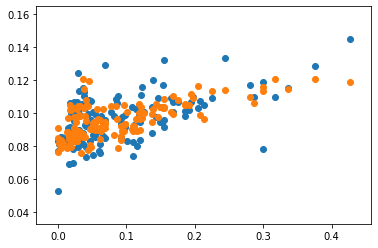

In [59]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], predicted_labels)

---

We obtain a mean squared error of approximately 0.13, indicating our algorithm predicted the labels with relatively high accuracy. The plot above shows the predicted data points and the actual test data points, which are clustered close together, as we would expect from a high-accuracy algorithm.  

---